<a href="https://colab.research.google.com/github/niwayanerdiani/E1E122024_Niwayan_erdiani/blob/main/E1E122024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#baca file csv
df = pd.read_csv('/content/data_balita.csv')
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [2]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [3]:
X = df.drop(['Umur (bulan)'], axis=1)

X.head()

,Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,laki-laki,44.591973,stunted
1,laki-laki,56.705203,tinggi
2,laki-laki,46.863358,normal
3,laki-laki,47.508026,normal
4,laki-laki,42.743494,severely stunted


In [4]:
# ubah data kategorik menjadi data numerik
df['Status Gizi'].replace(['stunted', 'tinggi','normal','severely stunted'], [0,1,2,3], inplace=True)

In [5]:
# ubah data kategorik menjadi data numerik
df['Jenis Kelamin'].replace(['laki-laki', 'perempuan'], [0,1], inplace=True)

In [6]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,0
1,0,0,56.705203,1
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,3


In [7]:
X = df.drop(['Umur (bulan)'], axis=1)

X.head()

,Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,44.591973,0
1,0,56.705203,1
2,0,46.863358,2
3,0,47.508026,2
4,0,42.743494,3


In [8]:
from sklearn.cluster import KMeans

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

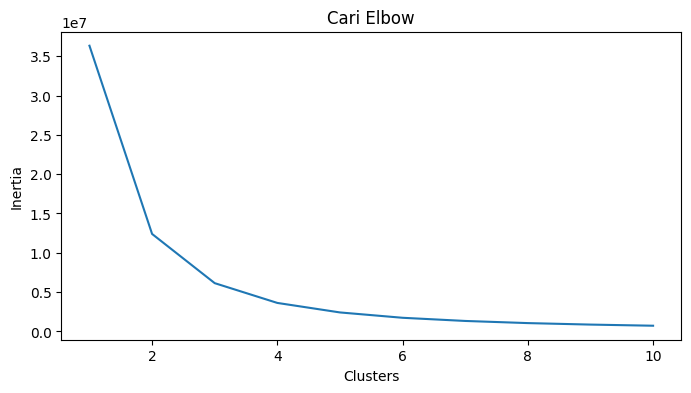

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [10]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
X.head()

,Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,44.591973,0
1,0,56.705203,1
2,0,46.863358,2
3,0,47.508026,2
4,0,42.743494,3


In [12]:
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

In [13]:
X.head()

,Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Labels
0,0,44.591973,0,3
1,0,56.705203,1,3
2,0,46.863358,2,3
3,0,47.508026,2,3
4,0,42.743494,3,3


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


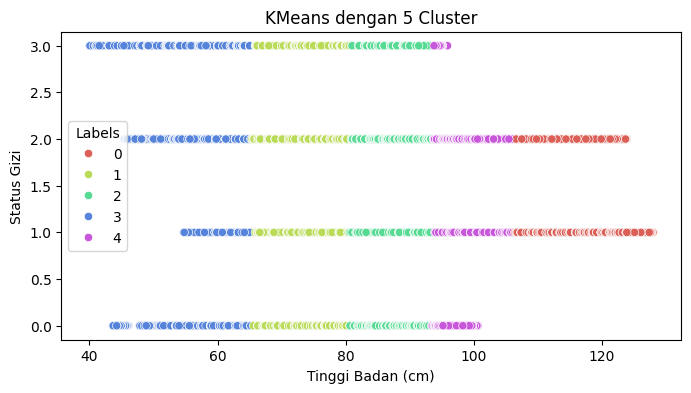

In [15]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['Tinggi Badan (cm)'], y=X['Status Gizi'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()